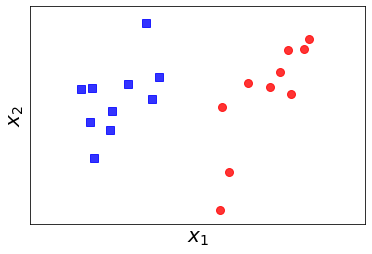

TypeError: 'P' must be a 'd' matrix of size (3, 3)

In [2]:
from cvxopt import matrix , solvers
import numpy as np
import matplotlib.pyplot as plt

# generate data
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)

# draw data
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)

plt.axis('equal')

# axis limits
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.show()

# Create matrices and vectors (primamy problem)
P = matrix(np.array([[1,0,0],[0,1,0],[0,0,0]]))
q = matrix(np.zeros((3,1)))
G = np.concatenate((X.T, np.ones((2*N, 1))), axis = 1) * np.concatenate((-y.T, -y.T, -y.T), axis = 1)
G = matrix(G)
h = matrix(-np.ones((2*N, 1)))

# solve
solvers.options['show_progress'] = False
solultion = solvers.qp(P,q,G,h)

# obtain solution
wb = np.array(solultion['x'])